## Perceptron

In [63]:
from usefull import bipolar, unipolar, get_random_except_first_row, reproduce_x_times
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron
import pandas as pd

In [64]:
x_unipolar = np.array(
    [
        [1, 1, 1, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 1]
    ]
)
x_bipolar = np.array(
    [
        [1, 1, 1, 1],
        [-1, -1, 1, 1],
        [-1, 1, -1, 1]
    ]
)
d_unipolar = np.array([[0, 0, 0, 1]])
d_bipolar = np.array([[-1, -1, -1, 1]])

x_unipolar.shape, x_bipolar.shape, d_unipolar.shape, d_bipolar.shape

((3, 4), (3, 4), (1, 4), (1, 4))

In [65]:
repetitions = 200
estimate_func = lambda v: unipolar(0, v)
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 2.39006962e-02,  8.71898953e-04,  1.03389557e+00,
          9.86165543e-01,  7.44692814e-03],
        [-9.64302919e-03,  1.03710594e+00, -2.33652184e-02,
          9.60513851e-01, -4.91282592e-02]]),
 array([[0, 0, 0, 1, 0]]))

In [66]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [67]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [68]:
perceptrons = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,alfas,epoch count
0,0.010101,6.80
1,0.020202,6.87
2,0.030303,8.13
3,0.040404,7.25
4,0.050505,7.77
5,0.060606,7.91
6,0.070707,7.52
7,0.080808,7.46
8,0.090909,7.56
9,0.101010,7.65


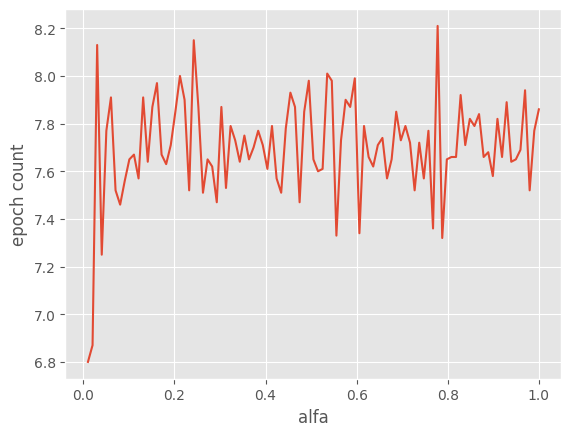

In [69]:
plt.plot([x.alfa for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.xlabel("alfa")
plt.ylabel("epoch count")
pd.DataFrame({"alfas":[x.alfa for x in perceptrons], "epoch count":[x.average_epoch_count for x in perceptrons]}).head(10)